In [ ]:
0from google.colab import drive
drive.mount('/content/drive')

SyntaxError: ignored

In [ ]:
# Importing EDA and Plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plots will appear inside notebooks
%matplotlib inline

# Importing Machine Learning Models from SciKit Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Importing Evaluation Libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, RocCurveDisplay

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/data_mining/Churn_Modelling.csv")
df.shape

NameError: ignored

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Understanding Data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
# Looking at values of each Category
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<Axes: >

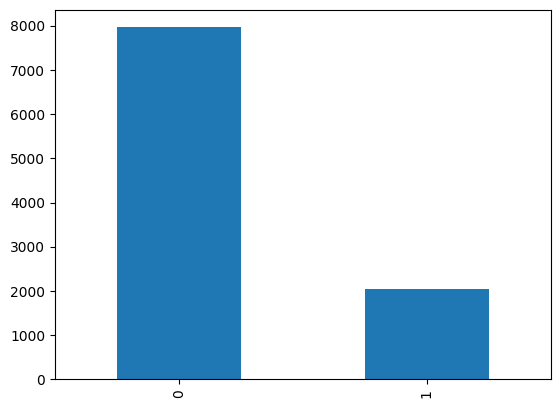

In [ ]:
df["Exited"].value_counts().plot(kind="bar")

In [ ]:
# Getting descriptive stats for the dataset
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
# Finding Missing values
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
corr_matrix = data.corr()
corr_matrix

In [ ]:
corr_matrix = df.corr()
corr_matrix

<ipython-input-12-208d05607fc1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


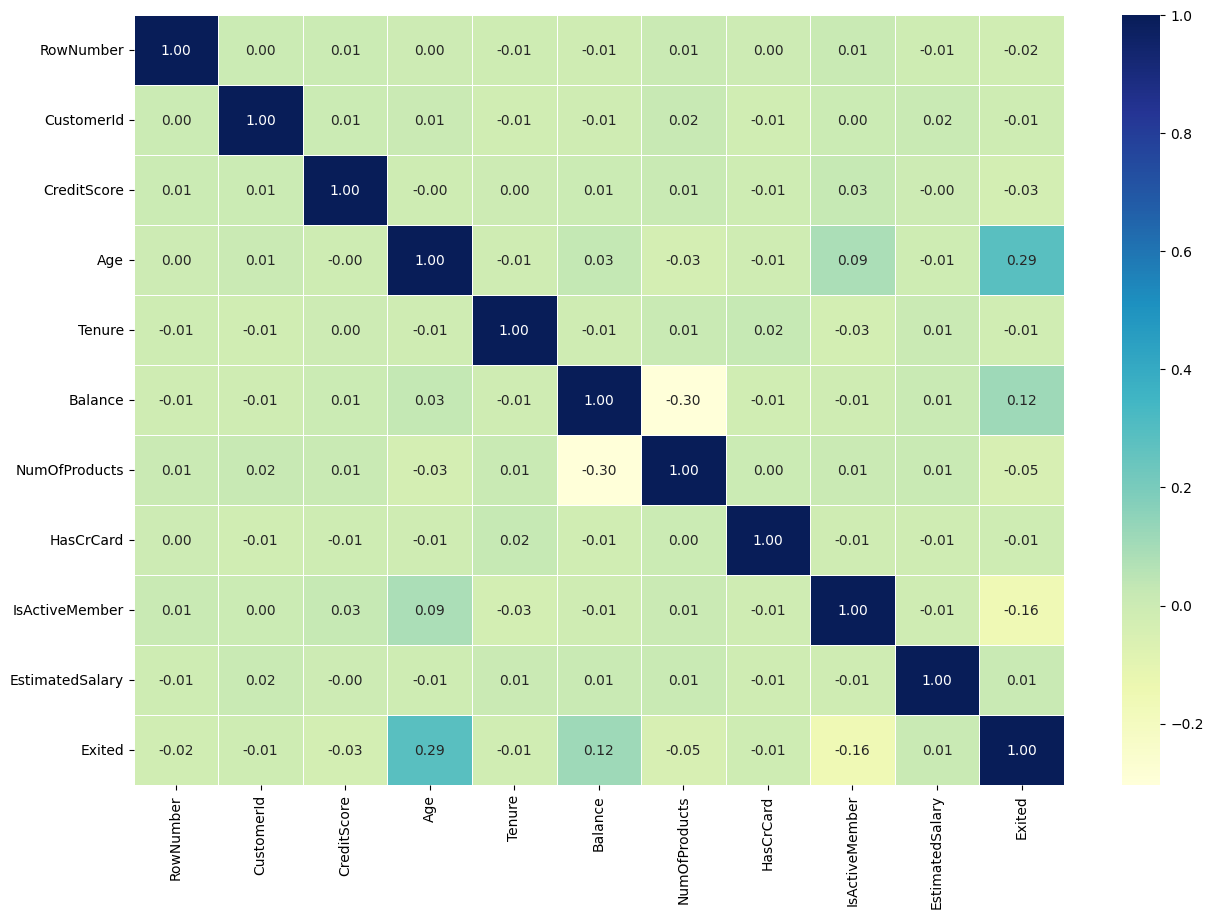

In [ ]:
# Plotting the Correlation Matrix for better visualisation
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt="0.2f", cmap="YlGnBu")

## Checking the relation between Customer churn on the basis of Age & Balance

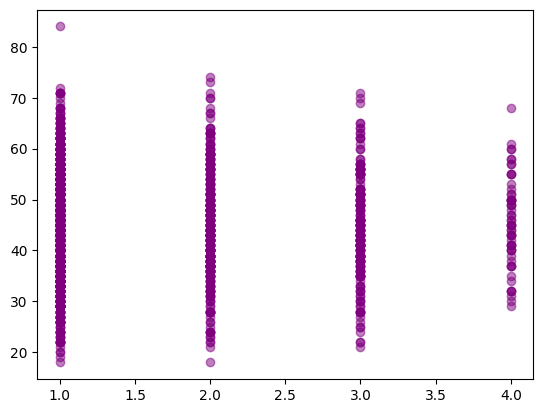

In [ ]:
plt.figure()

# Scatter with Positive Examples
plt.scatter(df.NumOfProducts[df.Exited == 1], df.Age[df.Exited == 1], c="purple", alpha=0.5)

# # Scatter with Negative Examples
# plt.scatter(df.Tenure[df.Exited == 0], df.Age[df.Exited == 0], c="lightblue", alpha=0.5)

<Axes: ylabel='Frequency'>

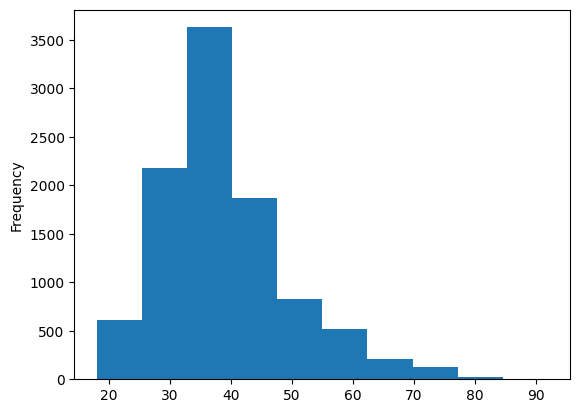

In [ ]:
# Check distribution of age
df.Age.plot(kind="hist")

# Machine Learning Models

# 1. Classification

## Choosing features and labels for prediction

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
X = df.drop(["Exited", "RowNumber", "CustomerId", "Surname"], axis=1)
y = df.Exited


In [ ]:
X.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71
6,822,France,Male,50,7,0.00,2,1,1,10062.80
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88
8,501,France,Male,44,4,142051.07,2,0,1,74940.50
9,684,France,Male,27,2,134603.88,1,1,1,71725.73


In [ ]:
y.head(10)

0    1
1    0
2    1
3    0
4    0
5    1
6    0
7    1
8    0
9    0
Name: Exited, dtype: int64

## Encode Categorical Features

In [ ]:
X_object_type = X.select_dtypes(include='object')
X_object_type

,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female
...,...,...
9995,France,Male
9996,France,Male
9997,France,Female
9998,Germany,Male


In [ ]:
X_numeric_type = X.select_dtypes(exclude='object')
X_numeric_type

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [ ]:
X_object_dummies = pd.get_dummies(X_object_type, drop_first=True)
X_object_dummies.head()

,Geography_Germany,Geography_Spain,Gender_Male
0,0,0,0
1,0,1,0
2,0,0,0
3,0,0,0
4,0,1,0


In [ ]:
X = pd.concat([X_numeric_type, X_object_dummies], axis=1)
X.head(20)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
5,645,44,8,113755.78,2,1,0,149756.71,0,1,1
6,822,50,7,0.00,2,1,1,10062.80,0,0,1
7,376,29,4,115046.74,4,1,0,119346.88,1,0,0
8,501,44,4,142051.07,2,0,1,74940.50,0,0,1
9,684,27,2,134603.88,1,1,1,71725.73,0,0,1


## Splitting data into train and test splits

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Training various Machine Learning Models

In [ ]:
log_reg = LogisticRegression()
knn = KNeighborsClassifier()
rfc = RandomForestClassifier()
svc = SVC()

models = {
    'Logistic Regression': log_reg,
    'KNN': knn,
    'Random Forest': rfc,
    'SVC': svc
}

def fit_and_score(models, X_train, y_train, X_test, y_test):
  """
    Fits and Evaluates machine Learning Models
    models: dictionary of machine learning models from SciKit learn
    X_train: set of training features (no labels)
    X_test: set of test features (no labels)
    y_train: training labels
    y_test: test labels
  """

  np.random.seed(101)

  model_accuracy = {}

  for model_name, model in models.items():
    model.fit(X_train, y_train)

    model_accuracy[model_name] = model.score(X_test, y_test)

  return model_accuracy



np.random.seed(42)
model_scores = fit_and_score(models, X_train, y_train, X_test, y_test)
model_scores

{'Logistic Regression': 0.781,
 'KNN': 0.758,
 'Random Forest': 0.8705,
 'SVC': 0.7885}

## Visulizing Performance

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'KNN'),
  Text(2, 0, 'Random Forest'),
  Text(3, 0, 'SVC')])

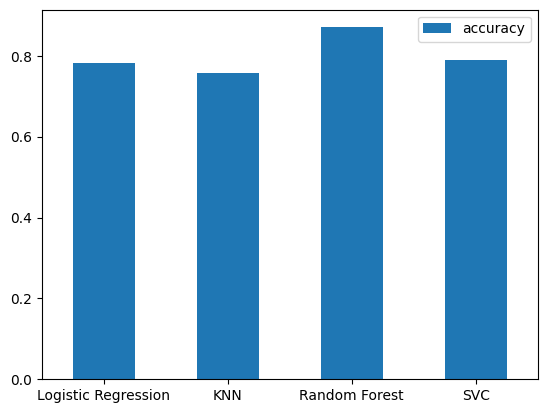

In [ ]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])

model_compare.T.plot.bar()

plt.xticks(rotation=0)

# Checking Hyperparameters for different Models

## Checking KNN for different values of K

In [ ]:
train_scores = []
test_scores = []

neighbors = range(1, 21)

for k in neighbors:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  train_scores.append(knn.score(X_train, y_train))
  test_scores.append(knn.score(X_test, y_test))

In [ ]:
train_scores

[1.0,
 0.8425,
 0.843875,
 0.81775,
 0.8205,
 0.807375,
 0.80875,
 0.805875,
 0.804875,
 0.801875,
 0.8005,
 0.799375,
 0.797875,
 0.7985,
 0.79675,
 0.79825,
 0.799125,
 0.798875,
 0.79925,
 0.79925]

In [ ]:
test_scores

[0.674,
 0.7645,
 0.73,
 0.771,
 0.758,
 0.781,
 0.7705,
 0.785,
 0.777,
 0.7865,
 0.78,
 0.785,
 0.784,
 0.787,
 0.786,
 0.789,
 0.7885,
 0.789,
 0.7885,
 0.788]

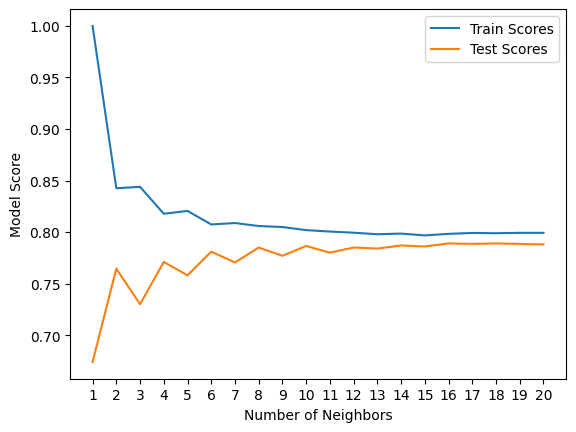

In [ ]:
# Plot K vs Errors
plt.plot(neighbors, train_scores, label="Train Scores")
plt.plot(neighbors, test_scores, label="Test Scores")
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.xticks(np.arange(1, 21, 1))
plt.legend()

## Hyperparameter Tuning for Logistc Regression using RandomizedSearchCV

In [ ]:
# Creating Hyperparameter grid for Logistic Regression
log_reg_grid = {
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear'],
    'penalty': ['l1', 'l2']
}

# Setting Random Seed
np.random.seed(101)

# Using Randomized Search Cross Validation to check for best parameters
rcv_log_reg = RandomizedSearchCV(LogisticRegression(), param_distributions=log_reg_grid, cv=5, n_iter=20, verbose=True)

rcv_log_reg.fit(X_train, y_train)

rcv_log_reg.score(X_test, y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.804

In [ ]:
rcv_log_reg.best_params_

{'solver': 'liblinear', 'penalty': 'l1', 'C': 1438.44988828766}

## Hyperparameter Tuning for Logistc Regression using GridSearchCV

In [ ]:
# Setting Random Seed
np.random.seed(101)

# Using Randomized Search Cross Validation to check for best parameters
gridcv_log_reg = GridSearchCV(LogisticRegression(), param_grid=log_reg_grid, cv=5, verbose=True)

gridcv_log_reg.fit(X_train, y_train)

gridcv_log_reg.score(X_test, y_test)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


0.804

In [ ]:
gridcv_log_reg.best_params_

{'C': 3792.690190732246, 'penalty': 'l1', 'solver': 'liblinear'}

## Hyperparameter Tuning for Random Forest Classification using RandomizedSearchCV

In [ ]:
# Creating hyperparamer grid for Random Forest Classification
rf_grid = {
    "n_estimators": np.arange(10, 1000, 50),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2),
    "criterion": ['gini', 'entropy']
}

# Setting Random Seed
np.random.seed(101)

# Using Randomized Search Cross Validation to check for best parameters
rcv_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_grid, cv=5, n_iter=20, verbose=True)

rcv_rf.fit(X_train, y_train)

rcv_rf.score(X_test, y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.8675

In [ ]:
rcv_rf.best_params_

{'n_estimators': 610,
 'min_samples_split': 10,
 'min_samples_leaf': 3,
 'max_depth': 10,
 'criterion': 'gini'}

## Hyperparameter Tuning for Support Vector Classifier using Kernels

In [ ]:
# Creating hyperparamer grid for Support Vector Classification
svc_grid = {
    'C': [0.01, 0.1, 1],
    'kernel': ['rbf']
}

# Setting Random Seed
np.random.seed(101)

# Using Randomized Search Cross Validation to check for best parameters
gridcv_svc = GridSearchCV(SVC(), param_grid=svc_grid, cv=5, verbose=True)

gridcv_svc.fit(X_train, y_train)

gridcv_svc.score(X_test, y_test)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


0.7885

In [ ]:
gridcv_svc.best_params_

{'C': 0.01, 'kernel': 'rbf'}

# Model Evaluation

## Evaluating Logistic Regression Classifier

In [ ]:
y_pred_log_reg = gridcv_log_reg.predict(X_test)
y_pred_log_reg

array([0, 0, 0, ..., 0, 0, 1])

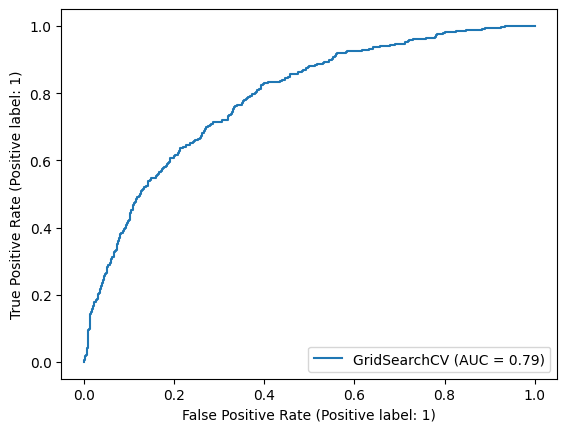

In [ ]:
# Plotting the ROC AUC for Logistic Regression Clasifier
RocCurveDisplay.from_estimator(estimator=gridcv_log_reg, X=X_test, y=y_test)

In [ ]:
# Confusion Matrix for Logistic Regression Clasifier
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
conf_matrix_log_reg

array([[1527,   50],
       [ 342,   81]])

<Axes: >

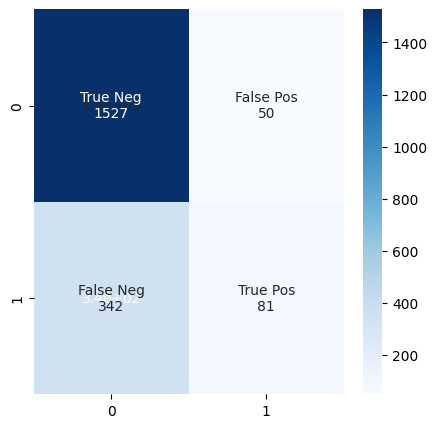

In [ ]:
# Visualising Confusion Matrix for Logistic Regression Clasifier
fig, ax = plt.subplots(figsize=(5, 5))
ax = sns.heatmap(conf_matrix_log_reg, annot=True, cbar=False)

plt.ylabel("True Label")
plt.xlabel("Predicted Label")

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in conf_matrix_log_reg.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix_log_reg, annot=labels, fmt='', cmap='Blues')

In [ ]:
# Classification Report For Logistic Regression Clasifier
print(classification_report(y_test, y_pred_log_reg))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1577
           1       0.62      0.19      0.29       423

    accuracy                           0.80      2000
   macro avg       0.72      0.58      0.59      2000
weighted avg       0.77      0.80      0.76      2000



## Evaluating Random Forest Classifier

In [ ]:
y_pred_rfc = rfc.predict(X_test)
y_pred_rfc

array([0, 0, 1, ..., 0, 0, 1])

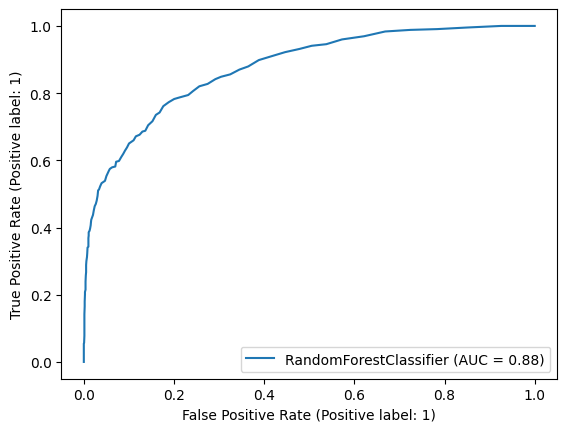

In [ ]:
# Plotting the ROC AUC for default Random Forest Clasifier
RocCurveDisplay.from_estimator(estimator=rfc, X=X_test, y=y_test)

In [ ]:
# Confusion Matrix for Default Random Forest
conf_matrix_rfc = confusion_matrix(y_test, y_pred_rfc)
conf_matrix_rfc

array([[1524,   53],
       [ 206,  217]])

<Axes: >

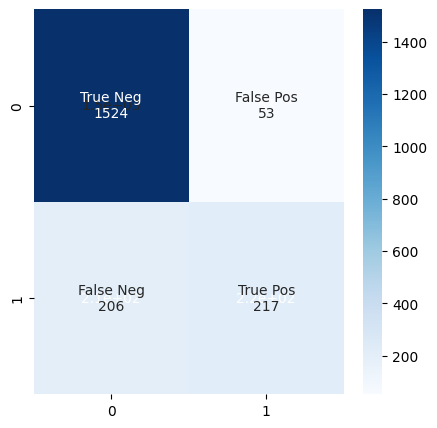

In [ ]:
# Visualising Confusion Matrix for Random Forest
fig, ax = plt.subplots(figsize=(5, 5))
ax = sns.heatmap(conf_matrix_rfc, annot=True, cbar=False)

plt.ylabel("True Label")
plt.xlabel("Predicted Label")

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in conf_matrix_rfc.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix_rfc, annot=labels, fmt='', cmap='Blues')

In [ ]:
# Classification Report For Random Forest Classifier
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1577
           1       0.80      0.51      0.63       423

    accuracy                           0.87      2000
   macro avg       0.84      0.74      0.77      2000
weighted avg       0.86      0.87      0.86      2000

